In [1]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
path = 'yelp_data/health_text_sentiment.csv'

In [4]:
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)


df = df[['stars',
 'text',
 'sent_value',
 'sent_score']]

In [6]:
df.head()

,stars,text,sent_value,sent_score
0,1,Please stay away from this place if you can! I...,-0.050645,negative
1,5,My husband has been a patient of Dr. Byrne for...,0.024962,positive
2,4,Dr. Byrne is a great doctor! She has great bed...,0.513333,positive
3,3,I'm raising my review as Dr Bryne's has been m...,-0.035714,negative
4,1,I wish I could give 0 stars. Worst office I've...,-0.048246,negative


## split 1 and 5 stars

In [7]:
data = df.ix[np.where((df.stars==1)|(df.stars==5))]
data.stars.replace(1,0,inplace=True)
data.stars.replace(5,1,inplace=True)

data.head()

,stars,text,sent_value,sent_score
0,0,Please stay away from this place if you can! I...,-0.050645,negative
1,1,My husband has been a patient of Dr. Byrne for...,0.024962,positive
4,0,I wish I could give 0 stars. Worst office I've...,-0.048246,negative
5,0,I went to the emergency room because i was hav...,0.137959,positive
6,1,Dr. Byrne is an excellent doctor with all the ...,0.250202,positive


## Vectorize reviews


In [8]:
# split
review = data['text'].values.astype(str)
sentiments = data['stars'].values

In [9]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors = vectorizer.fit_transform(review)

CPU times: user 28.4 s, sys: 3.67 s, total: 32.1 s
Wall time: 29.8 s


In [10]:
from sklearn.model_selection import train_test_split
# attention: we now use vectorize reviews, not the reviews column!!
X_train, X_test, y_train, y_test = train_test_split(vectors, sentiments,
 test_size=0.33, random_state=42)

In [11]:
from sklearn.svm import LinearSVC

# SVM classifier
classifier = LinearSVC()

# train
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [12]:
# lets make our predictions
preds = classifier.predict(X_test)

## Evaluate



In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.9813268644928353


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98      7241
          1       0.99      0.98      0.98     10485

avg / total       0.98      0.98      0.98     17726



## Confusion matrix

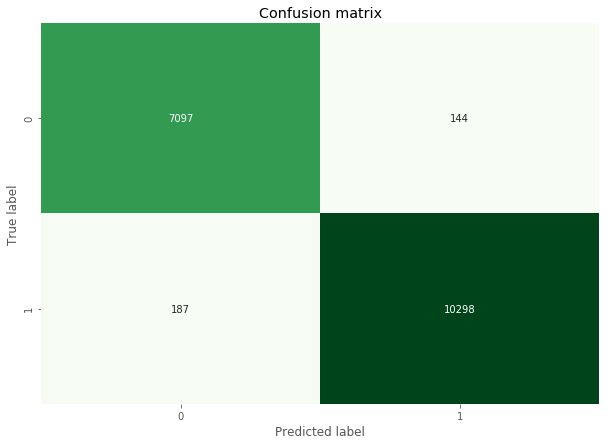

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Greens")
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Display Coefficients

In [18]:
feature_names = np.array(vectorizer.get_feature_names())
sorted_coef_index = classifier.coef_[0].argsort()

print('Lowest 10  Coef: \n{}\n'.format(feature_names[sorted_coef_index][:10]))
print('Highest 10 Coef: \n{}\n'.format(feature_names[sorted_coef_index][-10:]))

Lowest 10  Coef: 
['rude' 'not' 'told' 'horrible' 'worst' 'unprofessional' 'terrible' 'said'
 'never' 'no']

Highest 10 Coef: 
['excellent' 'and' 'friendly' 'dr' 'thank' 'awesome' 'love' 'best'
 'amazing' 'great']



# plot

In [19]:
#https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
     # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    #plt.title('asdf')
    plt.show()

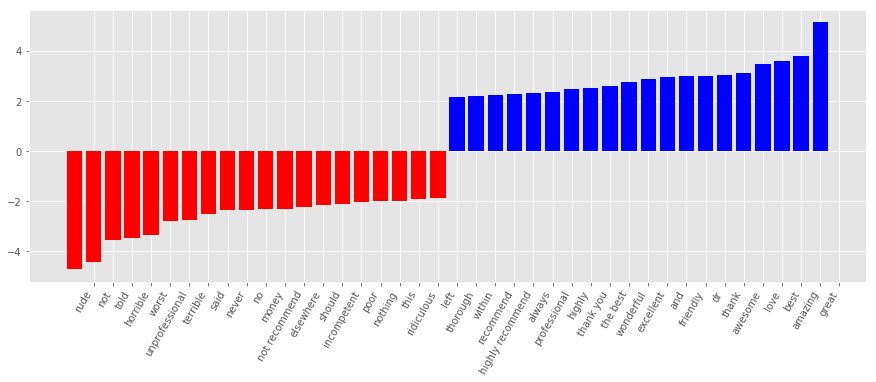

In [20]:
plot_coefficients(classifier, vectorizer.get_feature_names())

## Try All star revies

In [22]:
data2 = df.copy()

In [24]:
%%time
review = data2['text'].values.astype(str)
sentiments = data2['stars'].values

CPU times: user 234 ms, sys: 2.06 s, total: 2.3 s
Wall time: 2.25 s


In [25]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors = vectorizer.fit_transform(review)

CPU times: user 34.2 s, sys: 3.22 s, total: 37.5 s
Wall time: 35.2 s


In [26]:
from sklearn.model_selection import train_test_split
# attention: we now use vectorize reviews, not the reviews column!!
X_train, X_test, y_train, y_test = train_test_split(vectors, sentiments,
 test_size=0.33, random_state=42)

In [27]:
from sklearn.svm import LinearSVC

# SVM classifier
classifier = LinearSVC()

# train
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [28]:
# lets make our predictions
preds = classifier.predict(X_test)

# Evaluate

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.8323548906353565


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          1       0.81      0.97      0.88      7239
          2       0.40      0.07      0.12      1242
          3       0.46      0.06      0.11       768
          4       0.47      0.15      0.22      1439
          5       0.87      0.98      0.92     10434

avg / total       0.78      0.83      0.79     21122



## Confusion matrix

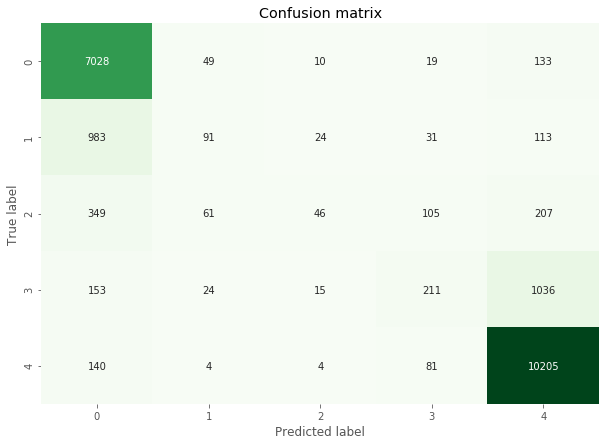

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Greens")
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Result Original text review : SVC

### 1 & 5 stars
- accuracy score: 0.9813268644928353


### 1 - 5 stars
- accuracy score: 0.8323548906353565